An automobile parts manufacturing company has collected data on transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your data science skills to find the underlying buying patterns of the customers, provide the company with suitable insights about their customers, and recommend customized marketing strategies for different segments of customers.

In [25]:
##
## importiing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




In [26]:
##
##

from google.colab import files
uploaded = files.upload()

Saving Sales_Data.xlsx to Sales_Data (2).xlsx


##PART A Agenda & Executive Summary of the data

- Contents of the ppt
- Problem statement
- About Data (Info, Shape, Summary Stats, your assumptions about data)



Summary from analysis
- dtypes: float64(2), int64(6), object(12)
- There are no duplicates in the data
- There are no null values within the features, all the columns have data and there are a total of 2747 instances per feature
- There are a total of 20 features(columns)
- Our data spans the whole globe, covering important cities and countries
- There are multiple products from covering land, air and water with corresponding product codes
- There are products in all types of shipping status.
- We have customers who have placed multiple orders.
- ORDERNUMBER and ORERLINENUMBER seem to be identifiers and they can be left out from the analysis unless specifically required.



In [27]:
##
##

sales1 = pd.read_excel('Sales_Data.xlsx')
sales1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [28]:
##
##

sales1.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


In [29]:
##
##

sales1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [30]:
##
##

sales1.describe().T


,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [31]:
##
##

sales1.shape

(2747, 20)

In [32]:
##
##

sales1.duplicated().sum()

0

In [33]:
##
##

sales1.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [34]:
##
##

sales1['STATUS'].value_counts()

Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [35]:
##
##

sales1['PRODUCTLINE'].value_counts()

Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64

In [36]:
##
##

sales1['CITY'].value_counts()

Madrid        304
San Rafael    180
NYC           152
Singapore      79
Paris          70
             ... 
Brisbane       15
Sevilla        15
Munich         14
Burbank        13
Charleroi       8
Name: CITY, Length: 71, dtype: int64

In [37]:
##
##

sales1['COUNTRY'].value_counts()

USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: COUNTRY, dtype: int64

In [38]:
##
##

sales1['DEALSIZE'].value_counts()

Medium    1349
Small     1246
Large      152
Name: DEALSIZE, dtype: int64

In [39]:
##
##

sales1['CONTACTFIRSTNAME'].value_counts()

Diego      259
Valarie    257
Sue         84
Michael     70
Juri        60
          ... 
Jesus       13
Thomas      12
Kee         10
Pascale      8
Carine       7
Name: CONTACTFIRSTNAME, Length: 72, dtype: int64

In [40]:
##
##

sales1['CONTACTLASTNAME'].value_counts()


Freyre      259
Nelson      204
Young       115
Frick        91
Yu           80
           ... 
Hardy        12
Tseng        11
Kuo          10
Cartrain      8
Schmitt       7
Name: CONTACTLASTNAME, Length: 76, dtype: int64

In [41]:
##
## lets change the ORDERDATE into normal calendar date

import datetime

def excel_date_to_datetime(excel_date):
    # Adjust for the leap year bug in Excel
    if excel_date > 59:
        excel_date -= 1
    return datetime.datetime(1899, 12, 30) + datetime.timedelta(days=excel_date)

In [43]:
##
## Apply the function to the entire column
## please run this if the date feature is not formatted properly

##sales2 = sales1.copy()


##sales2['ORDERDATE'] = sales2['ORDERDATE'].apply(excel_date_to_datetime)


In [44]:
##
##

sales2.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [45]:
##
##

sales2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [46]:
##
## downloading the new sales2 dataframe

#sales2.to_excel('sales2.xlsx')
#files.download('sales2.xlsx')

##PART A: Exploratory Analysis and Inferences

- Univariate, Bivariate, and multivariate analysis using data visualization (Weekly, Monthly, Quarterly, Yearly Trends in Sales and Sales Across different Categories of different features in the given data)
- Summarise the inferences




In [47]:
##
## I am just copying what i think are important feaatures lets say for making any predictions


sales1_imp = sales1[['QUANTITYORDERED', 'PRICEEACH',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'CITY', 'POSTALCODE', 'COUNTRY', 'DEALSIZE']].copy()


sales1_imp.head()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,30,95.70,2871.00,2018-02-24,828,Shipped,Motorcycles,95,NYC,10022,USA,Small
1,34,81.35,2765.90,2018-05-07,757,Shipped,Motorcycles,95,Reims,51100,France,Small
2,41,94.74,3884.34,2018-07-01,703,Shipped,Motorcycles,95,Paris,75508,France,Medium
3,45,83.26,3746.70,2018-08-25,649,Shipped,Motorcycles,95,Pasadena,90003,USA,Medium
4,36,96.66,3479.76,2018-10-28,586,Shipped,Motorcycles,95,Burlingame,94217,USA,Medium


<ipython-input-48-d1211e791b80>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales1_imp.corr())


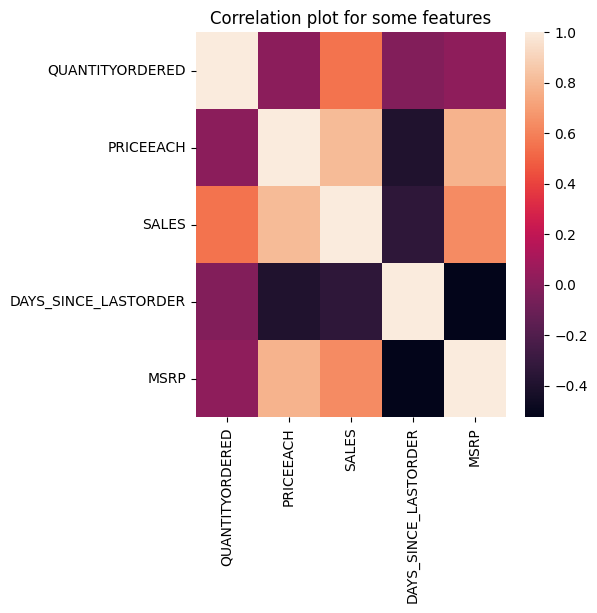

In [48]:
##
## now lets crete a heat map for the above important features

plt.figure(figsize = (5, 5))
sns.heatmap(sales1_imp.corr())
plt.title("Correlation plot for some features")
plt.show()


## as expected PRICEEACH and SALES make a good pair, so does MSRP.
## overall there seems to be no major correltion between the features used.
## we have some mild negative correltion with features DAYS_SINCE_LASTORDER to MSRP and PRICEEACH

In [49]:
##
##

sales2.head(10)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
5,10180,29,86.13,9,2497.77,2018-11-11,573,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
6,10188,48,114.84,1,5512.32,2018-11-18,567,Shipped,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium
7,10211,41,114.84,14,4708.44,2019-01-15,510,Shipped,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium
8,10223,37,107.18,1,3965.66,2019-02-20,475,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium
9,10237,23,101.44,7,2333.12,2019-04-05,432,Shipped,Motorcycles,95,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small


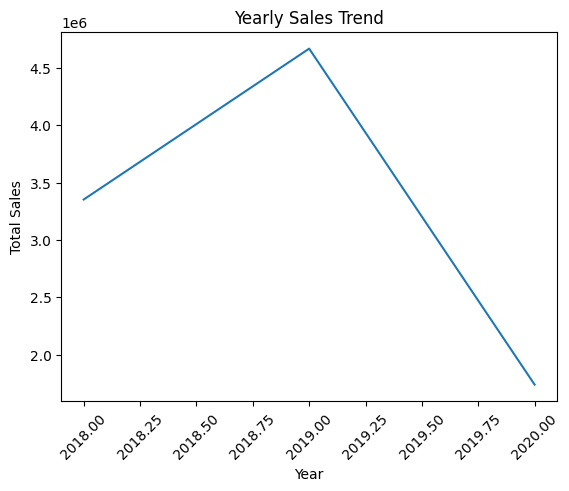

In [50]:
##
## Convert the ORDERDATE column to datetime objects
sales2['ORDERDATE'] = pd.to_datetime(sales2['ORDERDATE'])

## Group the data by year and calculate the sum of the SALES column
sales_by_year = sales2.groupby(sales2['ORDERDATE'].dt.year)['SALES'].sum()

## Plot the data as a line chart
plt.plot(sales_by_year.index, sales_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Trend')
plt.xticks(rotation=45)
plt.show()


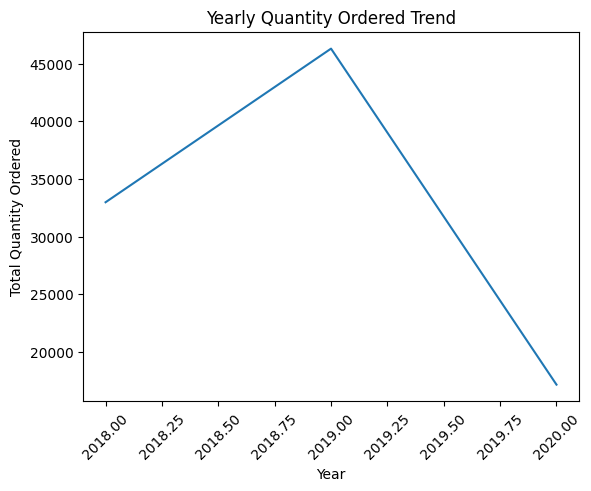

In [51]:
##
## Group the data by year and calculate the sum of the QUANTITYORDERED column
quantity_by_year = sales2.groupby(sales2['ORDERDATE'].dt.year)['QUANTITYORDERED'].sum()

## Plot the data as a line chart
plt.plot(quantity_by_year.index, quantity_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Quantity Ordered')
plt.title('Yearly Quantity Ordered Trend')
plt.xticks(rotation=45)
plt.show()


<ipython-input-52-3a3f9d88541d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_and_quantity_by_year = sales2.groupby(sales2['ORDERDATE'].dt.year)['SALES', 'QUANTITYORDERED'].sum()


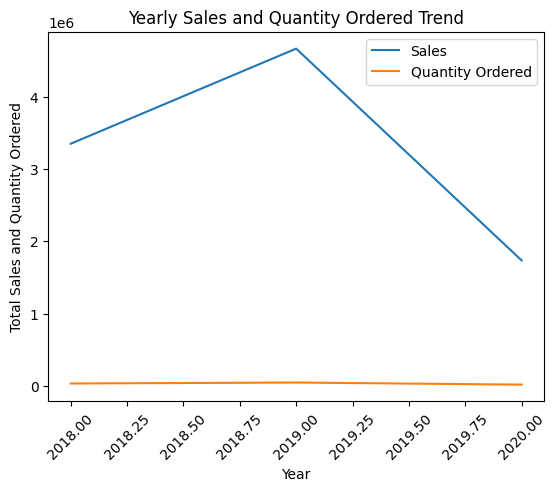

In [52]:
##
## Group the data by year and calculate the sum of the SALES and QUANTITYORDERED columns
sales_and_quantity_by_year = sales2.groupby(sales2['ORDERDATE'].dt.year)['SALES', 'QUANTITYORDERED'].sum()

## Plot the data as a line chart
plt.plot(sales_and_quantity_by_year.index, sales_and_quantity_by_year['SALES'], label='Sales')
plt.plot(sales_and_quantity_by_year.index, sales_and_quantity_by_year['QUANTITYORDERED'], label='Quantity Ordered')
plt.xlabel('Year')
plt.ylabel('Total Sales and Quantity Ordered')
plt.title('Yearly Sales and Quantity Ordered Trend')
plt.xticks(rotation=45)
plt.legend()
plt.show()


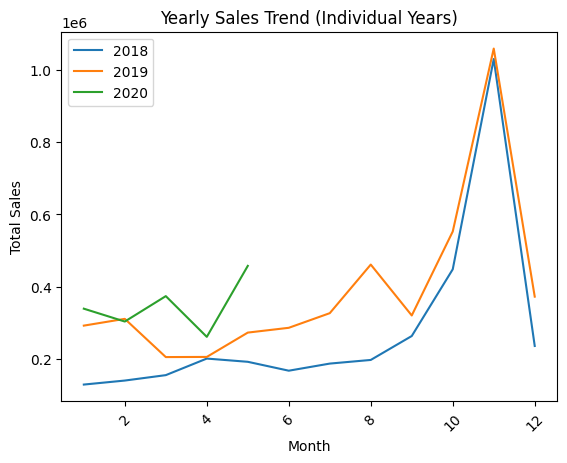

In [53]:
##
## Group the data by year and calculate the sum of the SALES column
sales_by_year = sales2.groupby(sales2['ORDERDATE'].dt.year)['SALES'].sum()

## Create a line chart for each year
for year in sales_by_year.index:
  year_data = sales2[sales2['ORDERDATE'].dt.year == year]
  year_data = year_data.groupby(year_data['ORDERDATE'].dt.month)['SALES'].sum()

  plt.plot(year_data.index, year_data.values, label=str(year))

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Trend (Individual Years)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


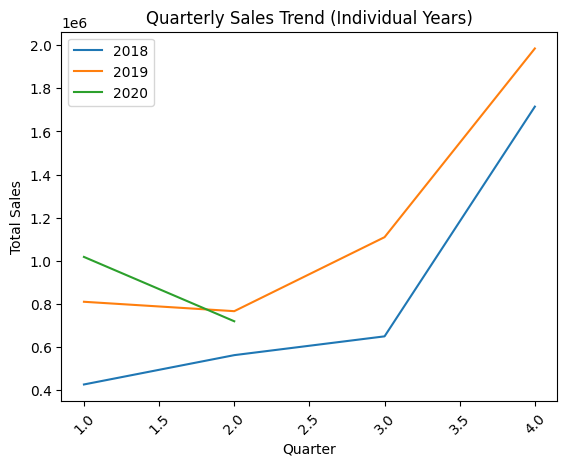

In [54]:
##
## Group the data by year and quarter and calculate the sum of the SALES column
sales_by_quarter = sales2.groupby([sales2['ORDERDATE'].dt.year, sales2['ORDERDATE'].dt.quarter])['SALES'].sum()

## Create a line chart for each year
for year in sales_by_quarter.index.get_level_values(0).unique():
  year_data = sales_by_quarter.loc[year]

  plt.plot(year_data.index, year_data.values, label=str(year))

plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Quarterly Sales Trend (Individual Years)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


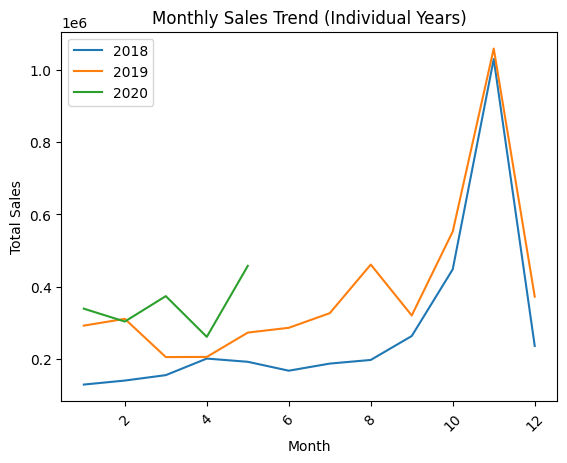

In [55]:
##
## Group the data by year and month and calculate the sum of the SALES column
sales_by_month = sales2.groupby([sales2['ORDERDATE'].dt.year, sales2['ORDERDATE'].dt.month])['SALES'].sum()

## Create a line chart for each year
for year in sales_by_month.index.get_level_values(0).unique():
  year_data = sales_by_month.loc[year]

  plt.plot(year_data.index, year_data.values, label=str(year))

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend (Individual Years)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


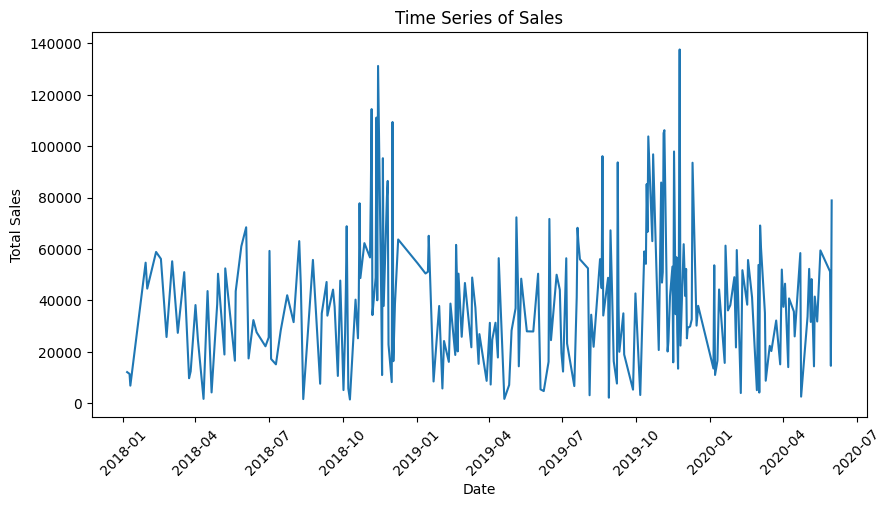

In [56]:
##
## Group the data by year and calculate the sum of the SALES column
sales_by_date = sales2.groupby(sales2['ORDERDATE'])['SALES'].sum()

## Create a line chart for the sales over time
plt.figure(figsize = (10, 5))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Time Series of Sales')
plt.xticks(rotation=45)
plt.show()


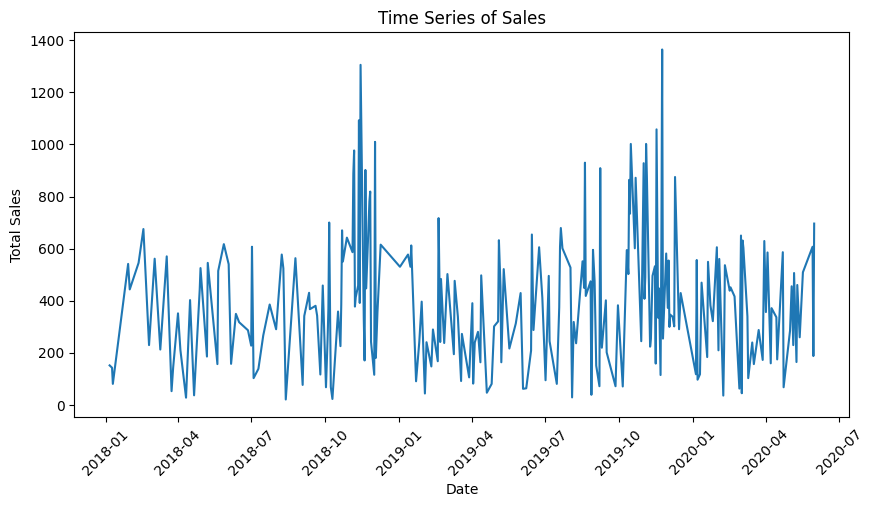

In [57]:
##
## Group the data by year and calculate the sum of the SALES column
sales_by_date = sales2.groupby(sales2['ORDERDATE'])['QUANTITYORDERED'].sum()

## Create a line chart for the sales over time
plt.figure(figsize = (10, 5))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Time Series of Sales')
plt.xticks(rotation=45)
plt.show()


<ipython-input-58-09f5d48b5aba>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_and_quantity_by_date = sales2.groupby(sales2['ORDERDATE'])['SALES', 'QUANTITYORDERED'].sum()


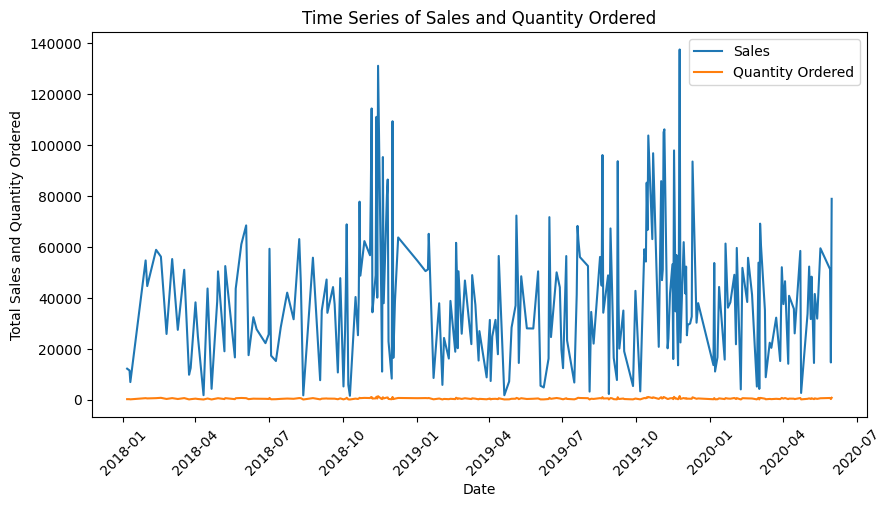

In [58]:
##
## Group the data by date and calculate the sum of the SALES and QUANTITYORDERED columns
sales_and_quantity_by_date = sales2.groupby(sales2['ORDERDATE'])['SALES', 'QUANTITYORDERED'].sum()

## Create a line chart for the sales and quantity ordered over time
plt.figure(figsize = (10, 5))
plt.plot(sales_and_quantity_by_date.index, sales_and_quantity_by_date['SALES'], label='Sales')
plt.plot(sales_and_quantity_by_date.index, sales_and_quantity_by_date['QUANTITYORDERED'], label='Quantity Ordered')
plt.xlabel('Date')
plt.ylabel('Total Sales and Quantity Ordered')
plt.title('Time Series of Sales and Quantity Ordered')
plt.xticks(rotation=45)
plt.legend()
plt.show()


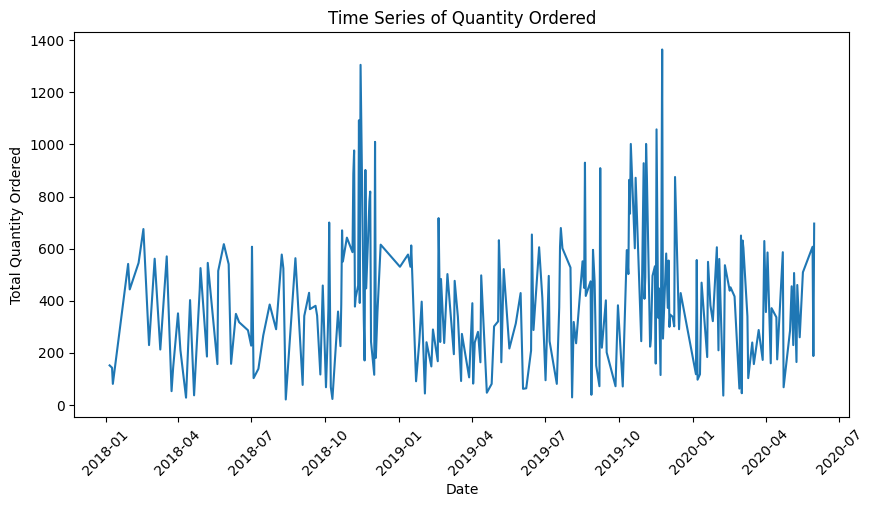

In [59]:
##
## Group the data by date and calculate the sum of the QUANTITYORDERED column
quantity_by_date = sales2.groupby(sales2['ORDERDATE'])['QUANTITYORDERED'].sum()

## Create a line chart for the sales over time
plt.figure(figsize = (10, 5))
plt.plot(quantity_by_date.index, quantity_by_date.values)
plt.xlabel('Date')
plt.ylabel('Total Quantity Ordered')
plt.title('Time Series of Quantity Ordered')
plt.xticks(rotation=45)
plt.show()


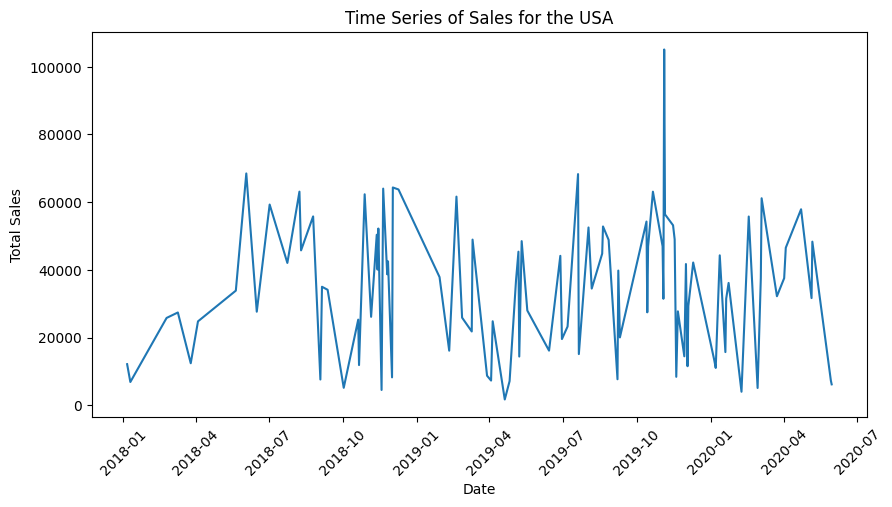

In [60]:
##
## Group the data by date and calculate the sum of the SALES column for the USA
sales_by_date_usa = sales2[sales2['COUNTRY'] == 'USA'].groupby(sales2['ORDERDATE'])['SALES'].sum()

## Create a line chart for the sales over time
plt.figure(figsize = (10, 5))
plt.plot(sales_by_date_usa.index, sales_by_date_usa.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Time Series of Sales for the USA')
plt.xticks(rotation=45)
plt.show()


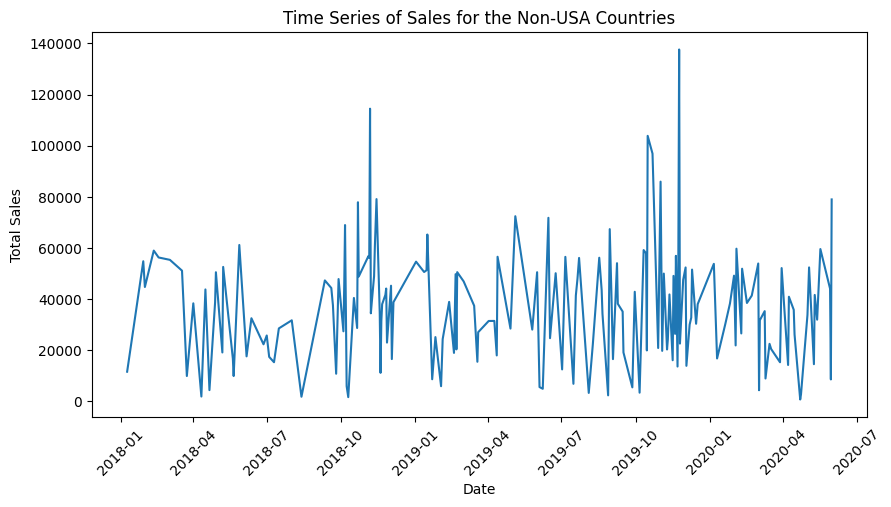

In [61]:
##
## Group the data by date and calculate the sum of the SALES column for the non-USA countries
sales_by_date_non_usa = sales2[sales2['COUNTRY'] != 'USA'].groupby(sales2['ORDERDATE'])['SALES'].sum()

## Create a line chart for the sales over time
plt.figure(figsize = (10, 5))
plt.plot(sales_by_date_non_usa.index, sales_by_date_non_usa.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Time Series of Sales for the Non-USA Countries')
plt.xticks(rotation=45)
plt.show()


In [62]:
##
##

sales2.head(7)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
5,10180,29,86.13,9,2497.77,2018-11-11,573,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
6,10188,48,114.84,1,5512.32,2018-11-18,567,Shipped,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium


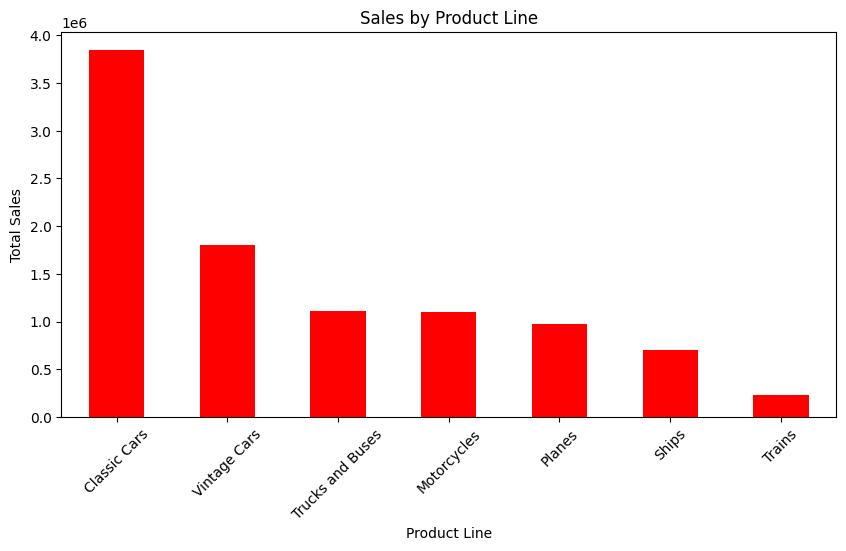

In [63]:
##
##

sales_by_product_line = sales2.groupby('PRODUCTLINE')['SALES'].sum()

## Sort the data by sales in descending order
sales_by_product_line = sales_by_product_line.sort_values(ascending=False)

## Create a bar chart of the sales by product line
plt.figure(figsize=(10, 5))
sales_by_product_line.plot(kind='bar', color = 'red')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Sales by Product Line')
plt.xticks(rotation=45)
plt.show()


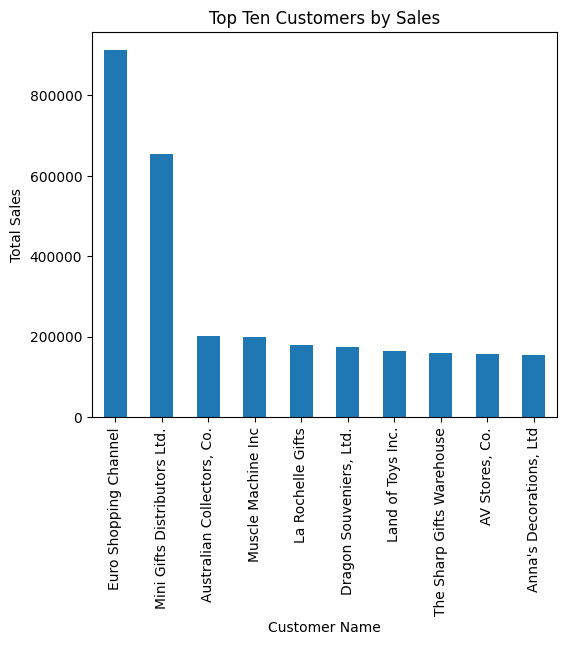

In [64]:
##
## Group the data by customer name and calculate the sum of the SALES column
sales_by_customer = sales2.groupby('CUSTOMERNAME')['SALES'].sum()

## Sort the data by sales in descending order
sales_by_customer = sales_by_customer.sort_values(ascending=False)

## Get the top ten customers by sales
top_ten_customers = sales_by_customer.head(10)

## Create a bar chart of the top ten customers by sales
plt.figure(figsize = (6, 5))
top_ten_customers.plot(kind='bar')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.title('Top Ten Customers by Sales')
plt.xticks(rotation=90)
plt.show()


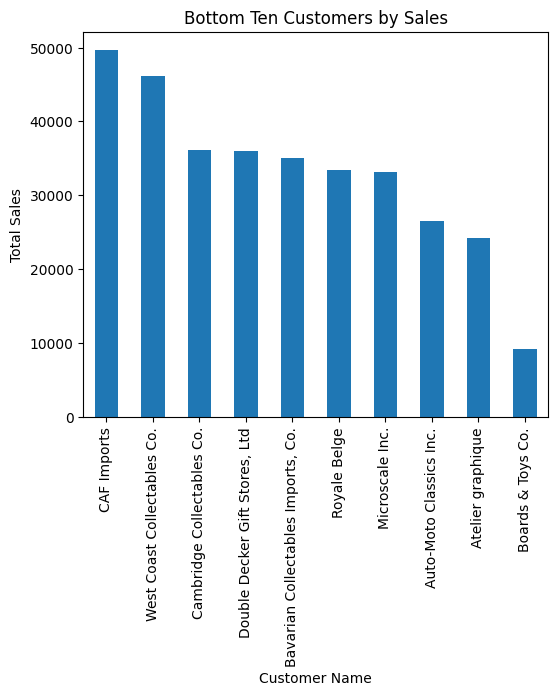

In [65]:
##
## Group the data by customer name and calculate the sum of the SALES column
sales_by_customer = sales2.groupby('CUSTOMERNAME')['SALES'].sum()

## Sort the data by sales in descending order
sales_by_customer = sales_by_customer.sort_values(ascending=False)

## Get the top ten customers by sales
top_ten_customers = sales_by_customer.tail(10)

## Create a bar chart of the top ten customers by sales
plt.figure(figsize = (6, 5))
top_ten_customers.plot(kind='bar')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.title('Bottom Ten Customers by Sales')
plt.xticks(rotation=90)
plt.show()


In [66]:
##
##

sales2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

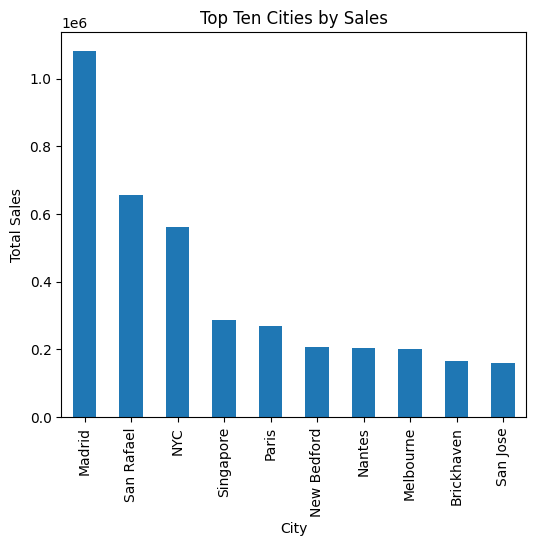

In [67]:
##
## Group the data by city and calculate the sum of the SALES column
sales_by_city = sales2.groupby('CITY')['SALES'].sum()

## Sort the data by sales in descending order
sales_by_city = sales_by_city.sort_values(ascending=False)

## Get the top ten cities by sales
top_ten_cities = sales_by_city.head(10)

## Create a bar chart of the top ten cities by sales
plt.figure(figsize = (6, 5))
top_ten_cities.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Top Ten Cities by Sales')
plt.xticks(rotation=90)
plt.show()


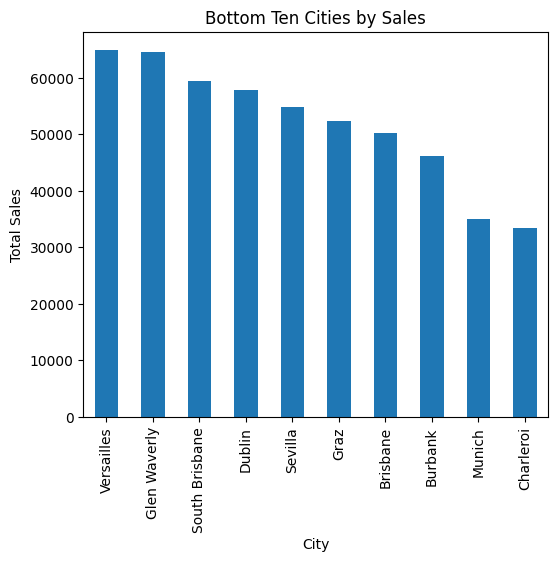

In [68]:
##
## Group the data by city and calculate the sum of the SALES column
sales_by_city = sales2.groupby('CITY')['SALES'].sum()

## Sort the data by sales in descending order
sales_by_city = sales_by_city.sort_values(ascending=False)

## Get the top ten cities by sales
top_ten_cities = sales_by_city.tail(10)

## Create a bar chart of the top ten cities by sales
plt.figure(figsize = (6, 5))
top_ten_cities.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Bottom Ten Cities by Sales')
plt.xticks(rotation=90)
plt.show()


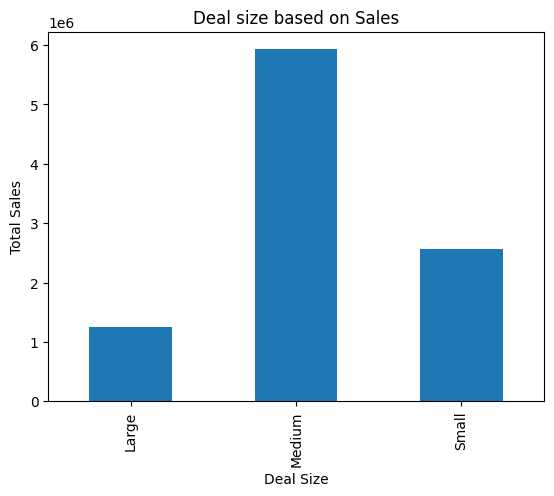

In [69]:
##
##


sales2.groupby('DEALSIZE')['SALES'].sum().plot(kind='bar')
plt.xlabel('Deal Size')
plt.ylabel('Total Sales')
plt.title('Deal size based on Sales')
plt.show()


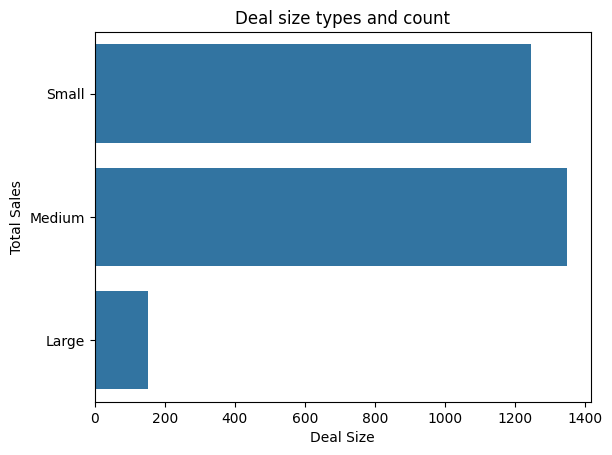

In [70]:
##
##

sns.countplot(sales1['DEALSIZE'])
plt.xlabel('Deal Size')
plt.ylabel('Total Sales')
plt.title('Deal size types and count')
plt.show()


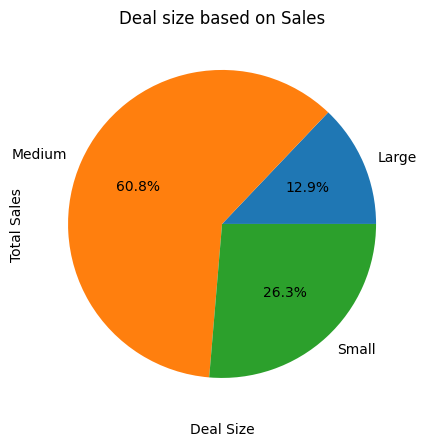

In [71]:
##
## Group the data by deal size and calculate the sum of the SALES column
sales_by_dealsize = sales2.groupby('DEALSIZE')['SALES'].sum()

## Create a pie chart of the sales by deal size
plt.figure(figsize = (6, 5))
sales_by_dealsize.plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Deal Size')
plt.ylabel('Total Sales')
plt.title('Deal size based on Sales')
plt.show()


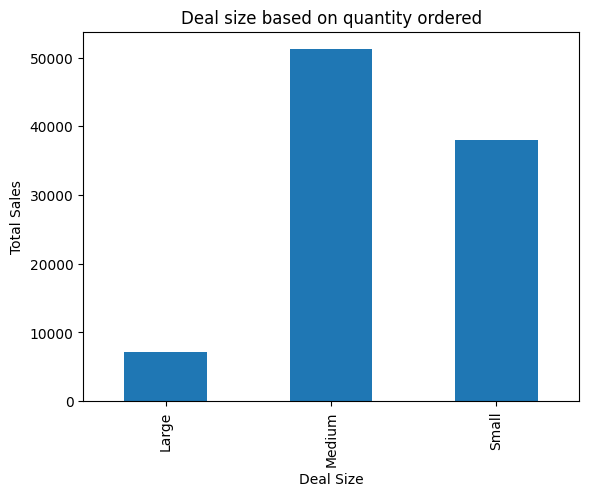

In [72]:
##
##

sales2.groupby('DEALSIZE')['QUANTITYORDERED'].sum().plot(kind='bar')
plt.xlabel('Deal Size')
plt.ylabel('Total Sales')
plt.title('Deal size based on quantity ordered')
plt.show()



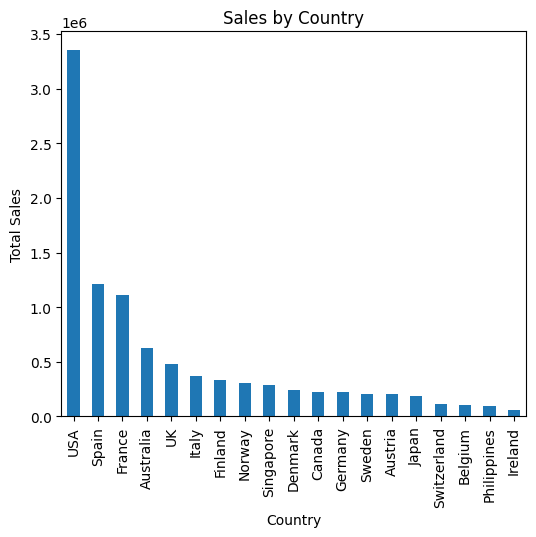

In [73]:
##
##

sales_by_country = sales2.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
plt.figure(figsize = (6, 5))
sales_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Sales by Country')
plt.xticks(rotation=90)
plt.show()


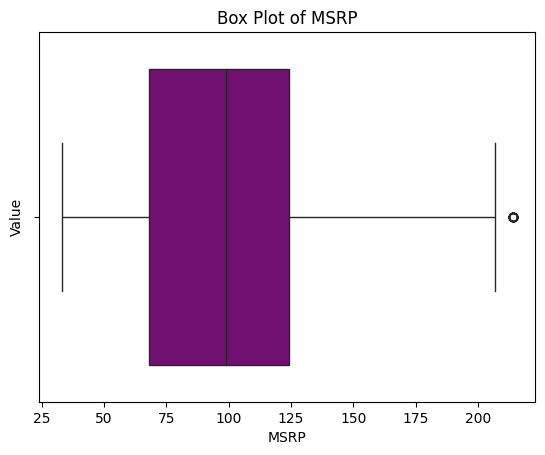

In [74]:
##
## Create a box plot of MSRP
sns.boxplot(x=sales2['MSRP'], color = 'purple')

## Add a title and labels
plt.title('Box Plot of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Value')

## Show the plot
plt.show()


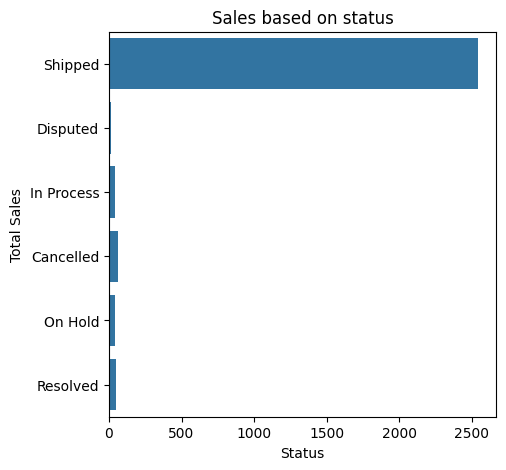

In [75]:
##
##


plt.figure(figsize = (5, 5))
sns.countplot(sales1['STATUS'])
plt.xlabel('Status')
plt.ylabel('Total Sales')
plt.title('Sales based on status')
plt.show()
